In [49]:
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [51]:
df.shape

(5572, 5)

> 1. Data Cleaning
> 2. EDA
> 3. Text preprocessing
> 4. Model building
> 5. Evaluation
> 6. Improvement
> 7. Demo Website on streamlit

# 1. Data Cleaning

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
# drop last three columns as most of the data are missing.
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [54]:
df.sample(5)

,v1,v2
3467,ham,yay! finally lol. i missed our cinema trip las...
1979,ham,Shhhhh nobody is supposed to know!
2906,ham,ALRITE
4709,ham,Ya i knw u vl giv..its ok thanks kano..anyway ...
417,spam,FREE entry into our å£250 weekly competition j...


In [55]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [56]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [58]:
df['target'] = encoder.fit_transform(df['target'])

In [59]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [61]:
# check for duplicate values
df.duplicated().sum()

403

In [62]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [63]:
# confirming for duplicate values
df.duplicated().sum()

0

In [64]:
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [65]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

> #### What percentage of the SMS's are ham and spam?

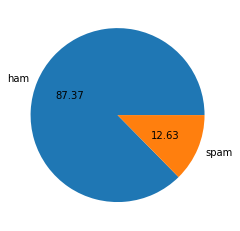

In [66]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

> Data is imbalanced : As there are more percentage of ham than spam.

In [67]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
# number of chars
df['num_chars'] = df['text'].apply(len)

In [69]:
# number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [70]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [71]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [72]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [73]:
# description of ham messages
df[df['target'] == 0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
# description of spam messages
df[df['target'] == 1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [75]:
import seaborn as sns
from matplotlib.lines import Line2D

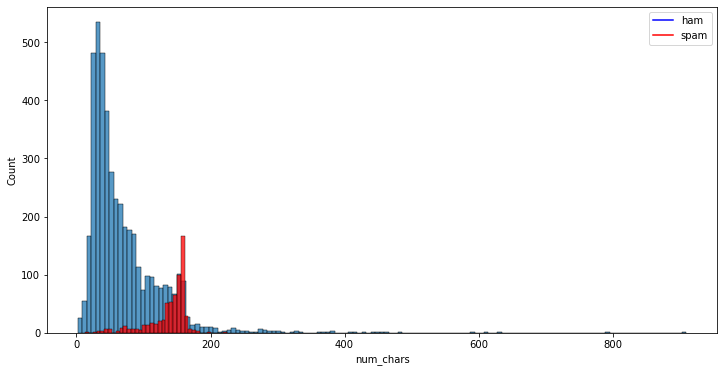

In [76]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars']) # ham
sns.histplot(df[df['target'] == 1]['num_chars'],color='red') # spam
legend_elements = [Line2D([0], [0], color='blue', label='ham'),
                   Line2D([0], [0], color='red', label='spam')]

plt.legend(handles=legend_elements)
plt.show()

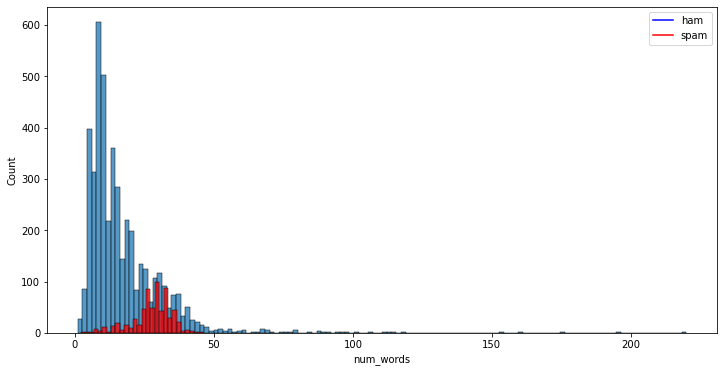

In [77]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) # ham
sns.histplot(df[df['target'] == 1]['num_words'],color='red') # spam
legend_elements = [Line2D([0], [0], color='blue', label='ham'),
                   Line2D([0], [0], color='red', label='spam')]

plt.legend(handles=legend_elements)
plt.show()

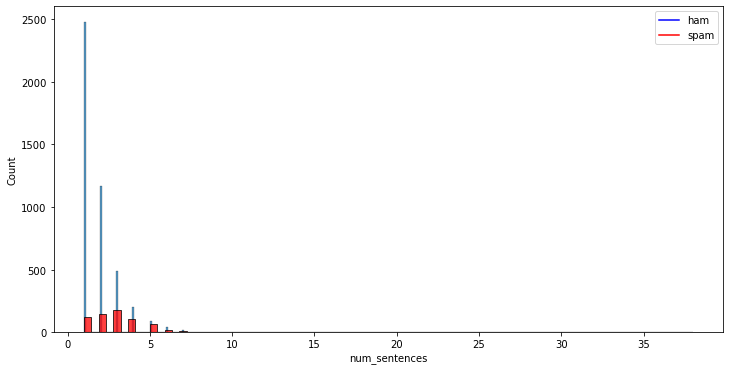

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences']) # ham
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red') # spam
legend_elements = [Line2D([0], [0], color='blue', label='ham'),
                   Line2D([0], [0], color='red', label='spam')]

plt.legend(handles=legend_elements)
plt.show()

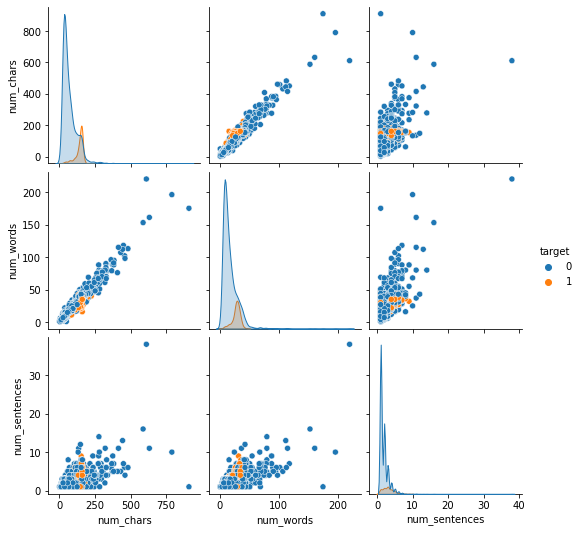

In [79]:
# relation of columns
sns.pairplot(df,hue='target')
plt.show()

<AxesSubplot:>

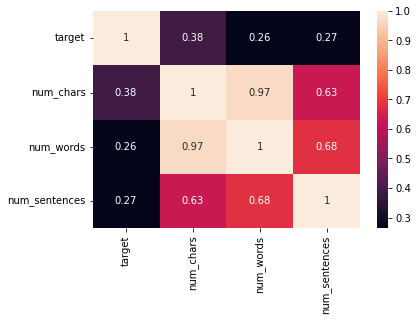

In [80]:
sns.heatmap(df.drop('text',axis=1).corr(),annot=True)

> By observing the heatmap we can see that all three columns have a great collinearity with each other, and so we will consider only one column as we will tackle multicollinearity amongst the columns, So in this case we would consider the *num_chars* column which has a considerable value of 0.38 with target variable.

# 3. Data preprocessing
> * Lower case
> * Tokenization
> * Removing special characters
> * Removing stop words and punctuation
> * Stemming

In [146]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

In [147]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    # since text is converted into list so we will loop through it now onwards
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [148]:
transform_text('Hi How Are You? @Nice that is Great &*. I loved your videos on ML, I would like coding with you sometimes ')

'hi nice great love video ml would like code sometim'

In [149]:
transform_text("Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol")

'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol'

In [150]:
df['text'][25]

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [151]:

# stopwords.words('english')

# string.punctuation

# ps.stem('Playing')

In [152]:
df['transformed_text'] = df['text'].apply(transform_text)

In [153]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Creating WordCloud of ham and spam

In [154]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [155]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

ValueError: Only supported for TrueType fonts

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [ ]:
# let's see what are the top 30 common words in spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [ ]:
len(spam_corpus)

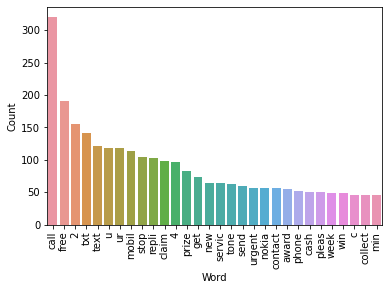

In [94]:
from collections import Counter
spam_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using seaborn barplot
sns.barplot(x='Word', y='Count', data=spam_counts)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
# let's see what are the top 30 common words in ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [96]:
len(ham_corpus)

35402

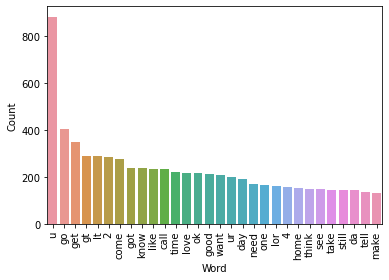

In [97]:
ham_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using seaborn barplot
sns.barplot(x='Word', y='Count', data=ham_counts)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [99]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [100]:
X.shape

(5169, 6708)

In [101]:
y = df['target'].values

In [102]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [106]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [107]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [108]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [109]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [110]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [111]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [112]:
# Appending the num_chars cols to X
X = np.hstack((X,df['num_chars'].values.reshape(-1,1)))

In [113]:
X.shape

(5169, 3001)

In [114]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [116]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [117]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [118]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [119]:
# We are selecting tfidf -> mnb from above observations

In [121]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in d:\ana\lib\site-packages (from xgboost) (1.7.1)



In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [123]:
# rfc = RandomForestClassifier(n_estimators=50,random_state=2)
# rfc.fit(X_train,y_train)
# y_pred4 = rfc.predict(X_test)
# print(accuracy_score(y_test,y_pred4))
# print(precision_score(y_test,y_pred4))

In [124]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [125]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [126]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [127]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [128]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    curr_acc,curr_prec = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",curr_acc)
    print("Precision - ",curr_prec)
    
    accuracy_scores.append(curr_acc)
    precision_scores.append(curr_prec)

D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9284332688588007
Precision -  0.7807017543859649
For  NB
Accuracy -  0.9410058027079303
Precision -  1.0
For  DT
Accuracy -  0.9448742746615088
Precision -  0.8785046728971962
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9622641509433962
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9818181818181818
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9672131147540983
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667


In [132]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.941006,1.000000
5,RF,0.969052,0.981818
8,ETC,0.976789,0.967213
4,LR,0.961315,0.962264
10,xgb,0.969052,0.941667
6,AdaBoost,0.964217,0.931624
9,GBDT,0.951644,0.931373
7,BgC,0.966151,0.899225
3,DT,0.944874,0.878505
1,KN,0.928433,0.780702


In [133]:
pf_df = pd.melt(performance_df,id_vars='Algorithm')
pf_df

,Algorithm,variable,value
0,NB,Accuracy,0.941006
1,RF,Accuracy,0.969052
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.961315
4,xgb,Accuracy,0.969052
5,AdaBoost,Accuracy,0.964217
6,GBDT,Accuracy,0.951644
7,BgC,Accuracy,0.966151
8,DT,Accuracy,0.944874
9,KN,Accuracy,0.928433


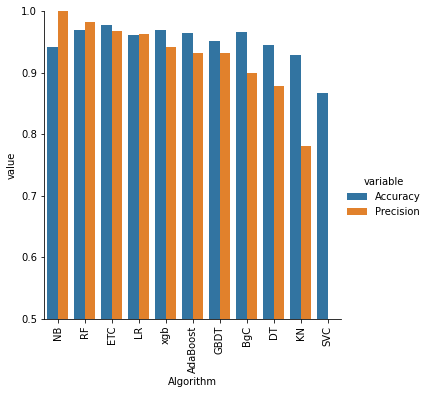

In [134]:
sns.catplot(x = 'Algorithm',y='value',
           hue='variable',data=pf_df,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

> The results are amazing!!! We can see that ***KNeighbors, NaiveBayes,and RandomForest*** are giving best precisions but the accuracy of only ***NaiveBayes, RandomForest, and ExtraTreeClassifier*** are comparable
Let's try improving our models by using different methods:
>> * Tuning parameters of tfidf
>> * Scaling 
>> * Adding extra features
>> * Voting Classifier (Combination of best performing models)
>> * Apply Stacking

In [135]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
0,SVC,0.866538,0.000000
1,KN,0.928433,0.780702
2,NB,0.941006,1.000000
3,DT,0.944874,0.878505
4,LR,0.961315,0.962264
5,RF,0.969052,0.981818
6,AdaBoost,0.964217,0.931624
7,BgC,0.966151,0.899225
8,ETC,0.976789,0.967213
9,GBDT,0.951644,0.931373


In [136]:
performance_df = performance_df.merge(temp_df,on='Algorithm')

# Performance of models after experiments done to improve its accuracy and precision

In [137]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_num_chars,Precision_num_chars
0,NB,0.941006,1.000000,0.941006,1.000000
1,RF,0.969052,0.981818,0.969052,0.981818
2,ETC,0.976789,0.967213,0.976789,0.967213
3,LR,0.961315,0.962264,0.961315,0.962264
4,xgb,0.969052,0.941667,0.969052,0.941667
5,AdaBoost,0.964217,0.931624,0.964217,0.931624
6,GBDT,0.951644,0.931373,0.951644,0.931373
7,BgC,0.966151,0.899225,0.966151,0.899225
8,DT,0.944874,0.878505,0.944874,0.878505
9,KN,0.928433,0.780702,0.928433,0.780702


> Let's try creating a voting classifier: It will combine the best performing models and will give even more better output (not in every case)

In [138]:
# Creating Voting Classifier: combination of best performing models
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

In [139]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc),('rf',rfc)],voting='soft')

In [140]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [141]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9526112185686654
Precision 1.0


> We can see that the Voting classifier gives us a precision of 100% but the accuracy is somehow low, so when compared with the other previous models the performance has not increased as we expected.

> Now let's try Applying stacking: It is similar to Voting classifier but instead it gives weightage to models that are combined

In [143]:
# Applying stacking: It is similar to Voting classifier but instead it gives weightage to models that are combined
estimators=[('svm',svc),('nb',mnb),('et',etc),('rf',rfc)]
final_estimator=RandomForestClassifier()

In [144]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [145]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


> After carrying out all the experiments we can observe that the **MultinomialNB** gives us the best performance, so for further prediction we will use only the model object mnb to predict outcomes.

In [297]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))